## Predicting the price of a diamond  based on its features in the dataset using linear regression

In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# getting the data
# make sure to change the path to where your dataset is located

diamond = pd.read_csv("D:\\DataSets For Practice\\diamonds.csv")
diamond_head = diamond.head(10)

In [3]:
# displaying the first 10 rows of the dataset

print(diamond_head)

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


### Pre processing

In [4]:
# checking for null values in the dataset
# data is clean, no null values
print(diamond.isnull().sum()) 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [5]:
# descrptive statistics of the dataset
print(diamond.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [6]:
# Rows and Column Numbers of the dataset
print(diamond.shape)

(53940, 10)


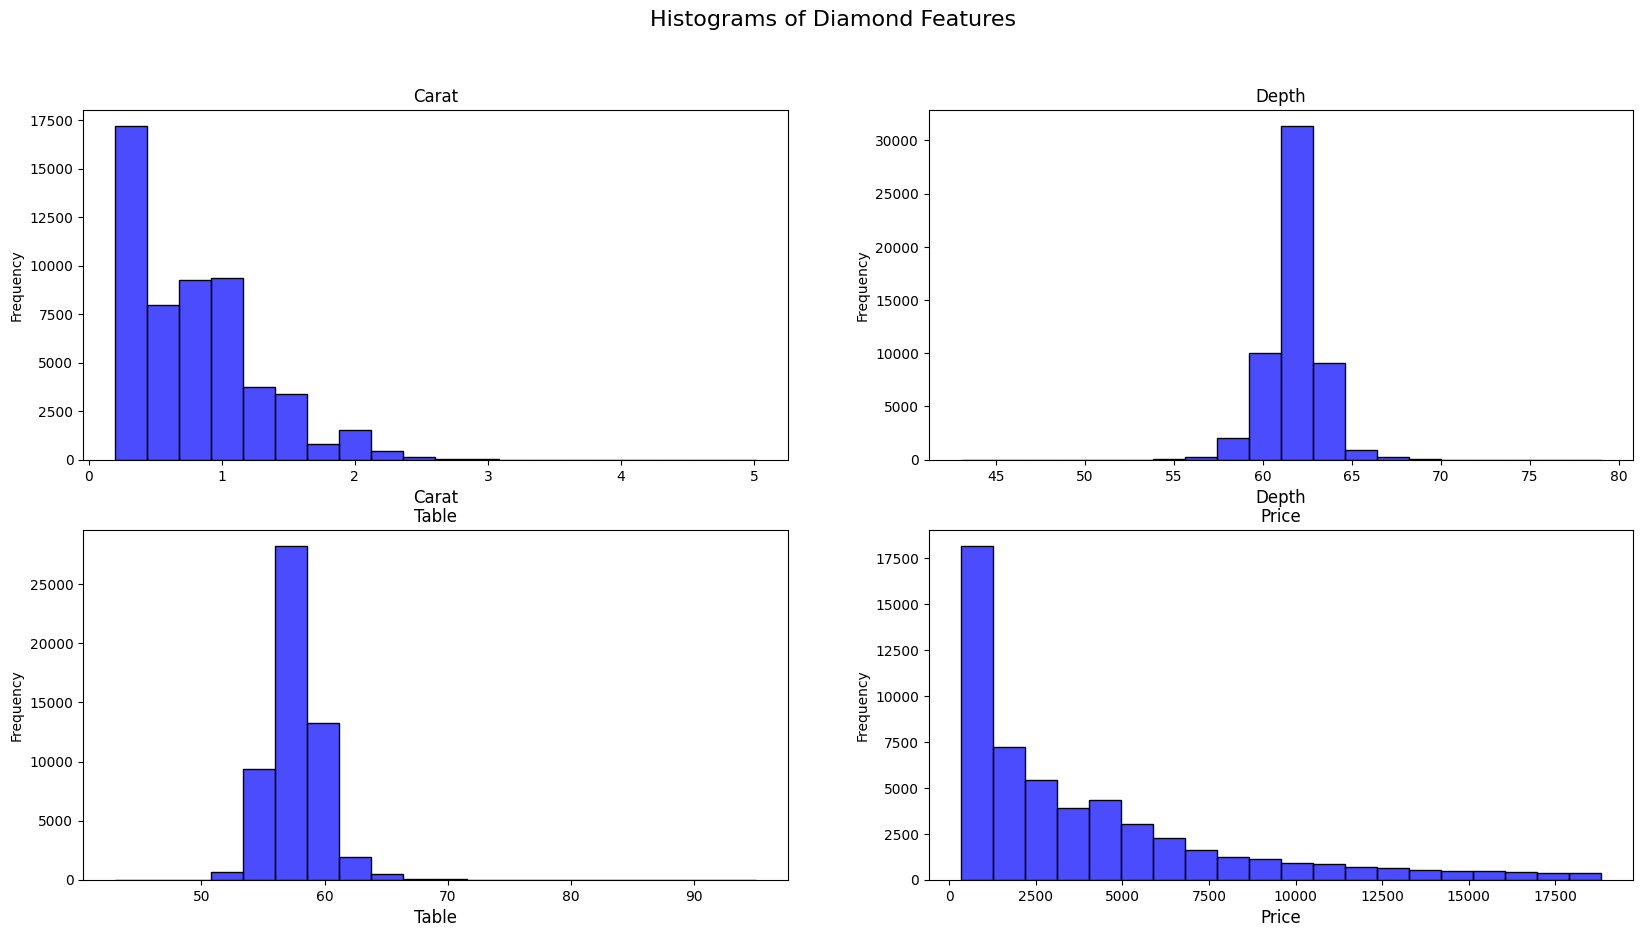

In [7]:
# Visualization of the dataset lets start with  histograms

fig , axis = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Histograms of Diamond Features', fontsize=16)

cols = ['carat', 'depth', 'table', 'price']
# selecting the columns to plot
for i, col in enumerate(cols):
    ax = axis[i // 2, i % 2]
    sns.histplot(diamond[col], bins=20,  ax=axis[i // 2, i % 2] , color='blue', alpha=0.7,)
    ax.set_title(col.capitalize())
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel('Frequency')
  

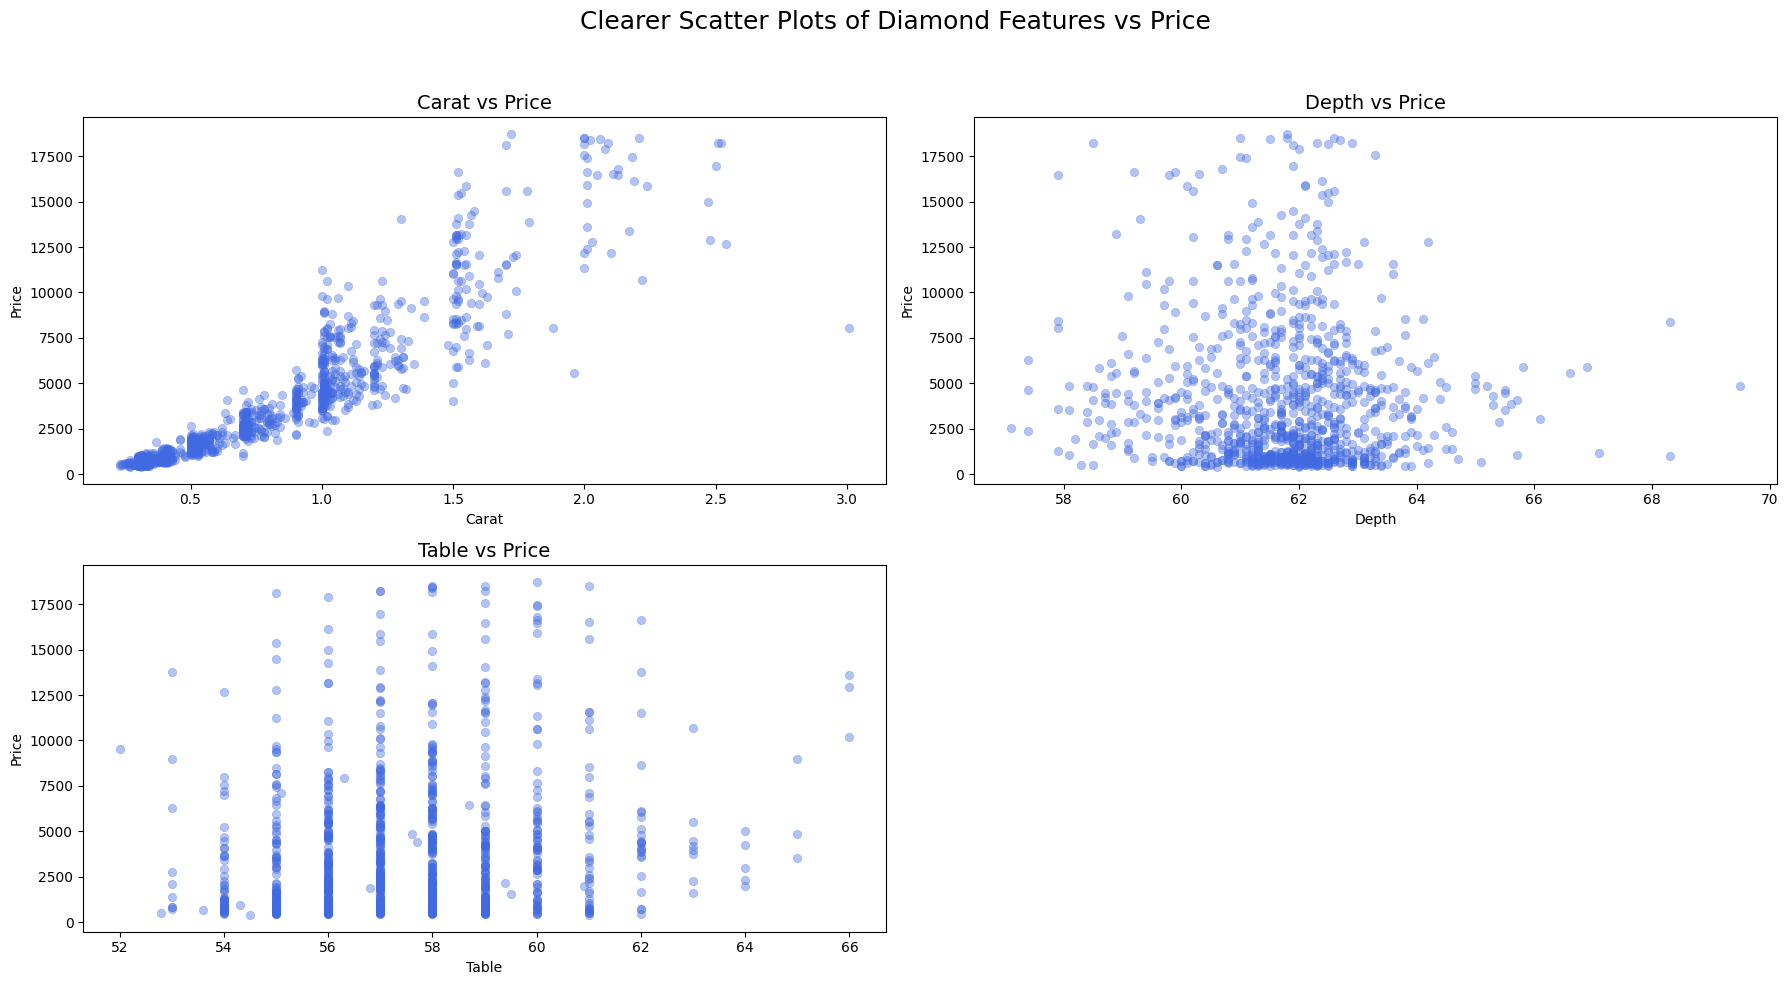

In [8]:
# Creating a Scatter Plot for the sample data See data distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Sample the data
sampled_data = diamond.sample(1000, random_state=1)

fig, axis = plt.subplots(2, 2, figsize=(18, 10))
plt.suptitle('Clearer Scatter Plots of Diamond Features vs Price', fontsize=18)

features = ['carat', 'depth', 'table']

for i, feature in enumerate(features):
    ax = axis[i // 2, i % 2]
    sns.scatterplot(x=sampled_data[feature], y=sampled_data['price'],
                    ax=ax, color='royalblue', alpha=0.4, edgecolor=None)
    ax.set_title(f'{feature.capitalize()} vs Price', fontsize=14)
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Price')

# Hide unused subplot
if len(features) < 4:
    axis[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



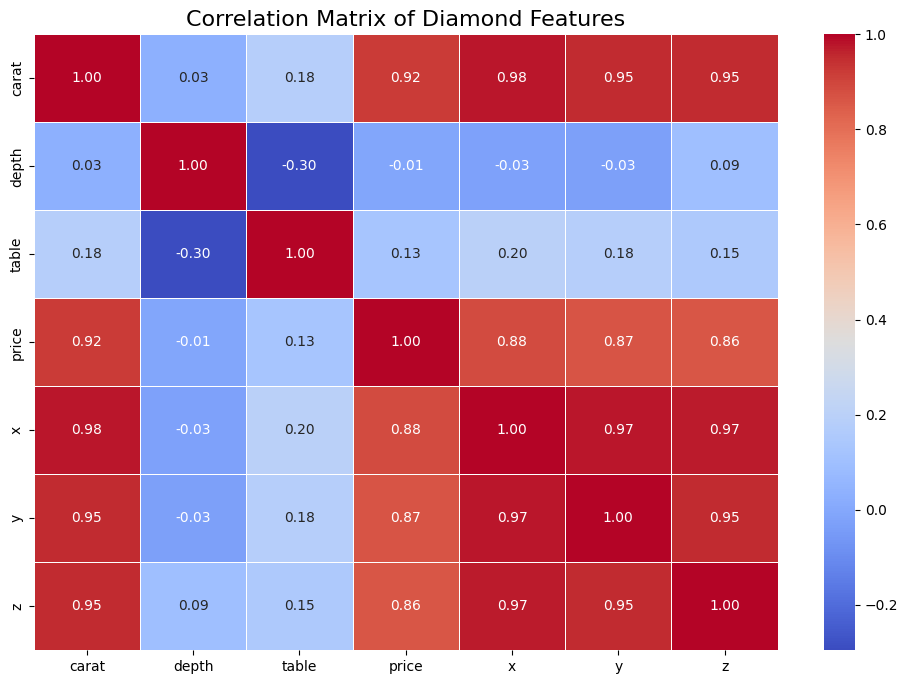

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


In [9]:
# lets correlate the features of the dataset
correlation_matrix = diamond.corr(numeric_only= True)    

# plotting the correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features', fontsize=16)
plt.show()
print(correlation_matrix)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select only 3 features
features = diamond[['carat', 'cut', 'clarity']]
target = diamond['price']

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=['cut', 'clarity'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")


Mean Squared Error: 1643866.16
R² Score: 0.8966
Model Accuracy: 0.8966


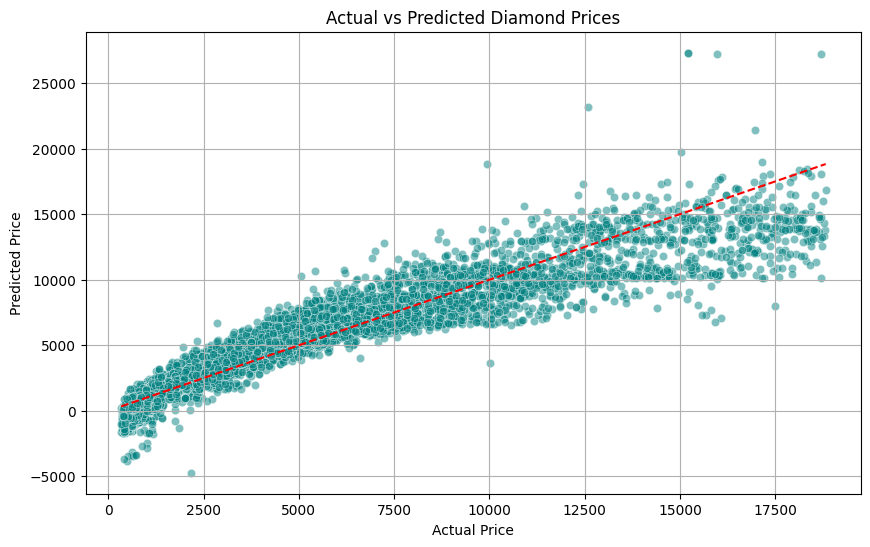

In [11]:
# Now, let’s visualize the actual versus predicted values to assess how well our model is performing:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Diamond Prices')
plt.grid(True)
plt.show()


In [12]:
# Diamond Price Prediction using Linear Regression
# This code allows users to input carat, cut, and clarity to predict diamond price
# === 🧑 User Input Section ===
carat = float(input("Enter the carat weight of the diamond (e.g. 1.0): "))
cut = input("Enter the cut quality (Fair, Good, Very Good, Premium, Ideal): ")
clarity = input("Enter the clarity grade (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF): ")

# Prepare user input as DataFrame
user_input = pd.DataFrame([{'carat': carat, 'cut': cut, 'clarity': clarity}])
user_encoded = pd.get_dummies(user_input, columns=['cut', 'clarity'])

# Match training columns (fill missing ones with 0)
user_encoded = user_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict the price
predicted_price = model.predict(user_encoded)[0]
print(f"\n💎 Estimated Diamond Price: ${predicted_price:,.2f}")



💎 Estimated Diamond Price: $9,365.13
